# DATA ANALYSIS (PANDAS), VISUALIZATION (MATPLOTLIB), AND OPTIMIZATION (CVXPY) using daily stock prices

# 1. Some work with the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dstocks = pd.read_csv('~/Git/ConvexOptimizationWithPython/Data/Stocks-closeP.csv')

plt.figure()
dstocks.plot(grid = True, figsize = [10,5]).axhline(y = 0, color = "black", lw = 1)
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 1000x500 with 1 Axes>

# Compute and visualize growth rates of prices (from one day to the next)

In [2]:
stock = dstocks.iloc[:,[1,2,3,4,5,6,7]] # Select colum 1-7 from the DataFrame

#Compute growth rates of that stock as [p2-p1]/p1
# A lambda function is applied locally
stock_change = stock.apply(lambda x: ((x - (x.shift(1))) / (x.shift(1))))

# Plot the dataframe of growth rates
stock_change.plot(grid = True, figsize = (12,8)).axhline(y = 0, color = "black", lw = 2)
# Then save the figure as a pdf file
plt.savefig('sample.pdf')

IndexError: positional indexers are out-of-bounds

In [ ]:
stock_change.describe()

In [3]:
#Extract the means
stock_means = stock_change.describe().iloc[1].values
stock_means

NameError: name 'stock_change' is not defined

In [4]:
# Make covariance matrix
stock_var = stock_change.cov()

NameError: name 'stock_change' is not defined

NameError: name 'stock_change' is not defined

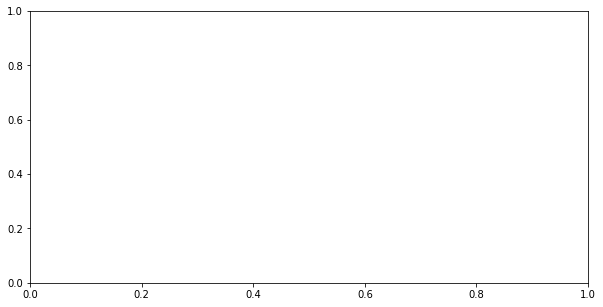

In [5]:
# Correlations matrix prettyfied

import seaborn as sns

f, ax = plt.subplots(figsize=(10, 5))
corr = stock_change.corr()
sns.heatmap(round(corr,2), annot=True,  ax=ax, cmap = "coolwarm", fmt='.2f', linewidths=.05)
t = f.suptitle('Correlation matrix stocks', fontsize=12)

# 2. Optimal Portfolio

In [6]:
import numpy as np
from cvxpy import *

Sigma = stock_var
mu = stock_means

w = Variable(7) # Decision variable
#w2 = Variable()
#w3 = Variable()
#w4 = Variable()
#w5 = Variable()

gamma = Parameter(nonneg=True) # Risk Parameter in the utility function
ret = mu*w
risk = quad_form(w, Sigma)

obj = Maximize(ret - gamma*risk)
constraints = [sum(w) == 1 , w >=0]

# Form the problem
prob = Problem(obj, constraints)

NameError: name 'stock_var' is not defined

In [7]:
port_data = []
ret_data = []
risk_data = []
prob_data = []

gamma_vals = [2,5,10]
for i in range(3):
    gamma.value = gamma_vals[i]
    prob.solve() # Solve the problem for a specific value of gamma
    risk_data.append(sqrt(risk).value) # optimal value of the risk (standard deviation)
    ret_data.append(ret.value) # optimal value of the return
    prob_data.append(prob.value) # maximum utility
    port_data.append(w.value)  

NameError: name 'gamma' is not defined

In [8]:
port_data

[]

In [9]:
# Present your results nicely

results = pd.DataFrame({'Portfolio':['TSLA', 'GM', 'AMZN', 'XOM', 'BAC', 'CAT', 'CVS'], 'Risk Coeff 2':port_data[0], 'Risk Coeff 5':port_data[1], 'Risk Coeff 10':port_data[2]})
results

IndexError: list index out of range